# Applied Data Science Capstone

## Introduction

This project helps to recommend a suitable place for opening an Italian restaurant.
We need to find places that will be best suited for opening an Italian restaurant in New Delhi. Since there are lots of restaurants in Delhi, we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Italian restaurants in vicinity. 


We will explore the neighborhoods and find the most suitable area suited for our restaurant based on the above criteria. Advantages of each area will be clearly expressed so that best possible final location can be chosen by stakeholders.


## Data Description

The data required for finding a suitable location for our restaurant will be data of places that are less crowded by Indian Restaurants. For this purpose, we need to collect this data on all the neighborhood of Delhi. Dataset used in this project is taken from Kaggle. (https://www.kaggle.com/shaswatd673/delhi-neighborhood-data)

Once we have collected all the data the places will be ranked on the basis of nearby venues that contribute to our target audience. Based on definition of our problem, factors that will influence our decision are:
1. Number of restaurants in a neighborhood
2. Number of Italian restaurants in a neighborhood

Coordinates of the centre of New Delhi, and of all the neighborhoods are obtained using Here API.

Number of restaurants and their type and location in every neighborhood will be obtained using Foursquare API.

## Explore Delhi

In [1]:
import pandas as pd
from pandas import DataFrame
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [2]:
delhi_df = pd.read_csv('datasets_512081_944688_delhi_dataSet.csv',index_col=0)

In [3]:
delhi_df.head()

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,NaN,NaN


In [4]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       185 non-null    object 
 1   Neighborhood  185 non-null    object 
 2   latitude      163 non-null    float64
 3   longitude     163 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.2+ KB


In [5]:
x_df = delhi_df[delhi_df.latitude.isnull()]
delhi_df = delhi_df.dropna()
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 184
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       163 non-null    object 
 1   Neighborhood  163 non-null    object 
 2   latitude      163 non-null    float64
 3   longitude     163 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [6]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 4 to 182
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       22 non-null     object 
 1   Neighborhood  22 non-null     object 
 2   latitude      0 non-null      float64
 3   longitude     0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 880.0+ bytes


In [7]:
URL = "https://geocode.search.hereapi.com/v1/geocode"

api_key = 'oai5nFUpkH3IJqs1BpMXDj4cTQrpeBGstkMHan6Y2m0' # Acquire from developer.here.com
for i in range(0,22):
    location = x_df.Neighborhood.iloc[[i]] + ', Delhi, India' #taking user input
    PARAMS = {'apikey':api_key,'q':location}


# sending get request and saving the response as response object 
    r = requests.get(url = URL, params = PARAMS) 
    data = r.json()

    x_df.latitude.iloc[[i]] = data['items'][0]['position']['lat']
    x_df.longitude.iloc[[i]] = data['items'][0]['position']['lng']

C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
x_df

,Borough,Neighborhood,latitude,longitude
4,North West Delhi,Begum Pur,28.73330,77.06542
16,North West Delhi,Rohini Sub City,28.73356,77.10401
24,North Delhi,Ghantewala,28.65627,77.23192
25,North Delhi,Gulabi Bagh,28.67546,77.18864
35,North Delhi,Sadar Bazaar,28.65979,77.20846
42,North Delhi,Tees Hazari,28.66600,77.21520
52,North East Delhi,New Usmanpur,28.68249,77.25651
53,North East Delhi,Sadatpur,28.63410,77.21689
64,Central Delhi,Rajender Nagar,28.64046,77.18555
65,Central Delhi,Sadar Bazaar,28.65979,77.20846


In [9]:
delhi_df = pd.concat([delhi_df,x_df])
delhi_df.reset_index(drop = True, inplace = True)

In [10]:
delhi_df = delhi_df[delhi_df['latitude']<29]
delhi_df = delhi_df[delhi_df['longitude']>77]
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 184
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       174 non-null    object 
 1   Neighborhood  174 non-null    object 
 2   latitude      174 non-null    float64
 3   longitude     174 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.8+ KB


In [11]:
location =  'Delhi, India' #taking user input
PARAMS = {'apikey':api_key,'q':location}


# sending get request and saving the response as response object 
r = requests.get(url = URL, params = PARAMS) 
data = r.json()

latitude = data['items'][0]['position']['lat']
longitude = data['items'][0]['position']['lng']

Let's plot all our neighborhoods on a map using folium package. Our map is centered around New Delhi.

In [12]:
import folium
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(delhi_df['latitude'], delhi_df['longitude'], delhi_df['Borough'], delhi_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

To get the venues we use foursquare apis.

Since we want to open a restaurant we would like to explore the food sector.

In [13]:
CLIENT_ID = 'VD3ROH2EDENTX1EC3JPHS0DQH4ZNQZUJ2N2TZXV15EWA21EP'
CLIENT_SECRET= 'XTNHJ1BYTDO41NXHBYCANPRU122G02PDTPUPMT3SEGJV1IKA'
VERSION = '20180605' 
category = '4d4b7105d754a06374d81259'
LIMIT = 100

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
delhi_venues = getNearbyVenues(names=delhi_df['Neighborhood'],
                                   latitudes=delhi_df['latitude'],
                                   longitudes=delhi_df['longitude']
                                  )
delhi_venues.groupby('Neighborhood').count()

Adarsh Nagar
Ashok Vihar
Azadpur
Bawana
Jahangirpuri
Karala
Keshav Puram
Kingsway Camp
Kohat Enclave
Narela
Pitam Pura
Rani Bagh
Rithala
Shalimar Bagh
Shakti Nagar
Bara Hindu Rao
Chandni Chowk
Chawri Bazaar
Civil Lines
Dariba Kalan
Kamla Nagar
Kashmiri Gate
Kotwali
Lahori Gate
Nehru Vihar
Paharganj
Pratap Nagar
Roshanara Bagh
Sangam Vihar
Sant Nagar
Sarai Kale Khan
Sarai Rohilla
Shakti Nagar
Timarpur
Wazirabad
Babarpur
Dilshad Garden
Kabir Nagar
Mandoli
Maujpur
Nand Nagri
Naveen Shahdara
Shahdara
Sonia Vihar
Shastri Park
Yamuna Vihar
Chandni Chowk
Daryaganj
Jhandewalan
Karol Bagh
Bara Hindu Rao
Paharganj
Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Pragati Maidan
Brij Puri
East Vinod Nagar
Geeta Colony
Jhilmil Colony
Krishna Nagar
Laxmi Nagar
Mayur Vihar
Pandav Nagar
Patparganj
Preet Vihar
Anand Vihar
Shakarpur
Vasundhara Enclave
Vishwas Nagar
Vivek Vihar
Shahdara
Alaknanda
Chhattarpur
Chittaranjan Park
Dayanand Colony
Defence Co

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adarsh Nagar,4,4,4,4,4,4
Alaknanda,9,9,9,9,9,9
Anand Vihar,6,6,6,6,6,6
Ashok Vihar,4,4,4,4,4,4
Azadpur,4,4,4,4,4,4
...,...,...,...,...,...,...
Vasundhara Enclave,5,5,5,5,5,5
Vikaspuri,4,4,4,4,4,4
Vivek Vihar,1,1,1,1,1,1


In [16]:
delhi_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614192,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,Adarsh Nagar,28.614192,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,Adarsh Nagar,28.614192,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant
...,...,...,...,...,...,...,...
957,Tihar Village,28.635470,77.107780,The Tandoor,28.634404,77.104454,Chinese Restaurant
958,Uttam Nagar,28.617390,77.052810,Litti Haat,28.616531,77.052722,Indian Restaurant
959,Uttam Nagar,28.617390,77.052810,Hot and Spice,28.617511,77.051035,Indian Restaurant
960,Uttam Nagar,28.617390,77.052810,D.K Chinese Food,28.619637,77.054335,Chinese Restaurant


#### We can visulaize all the venues using seaborn library

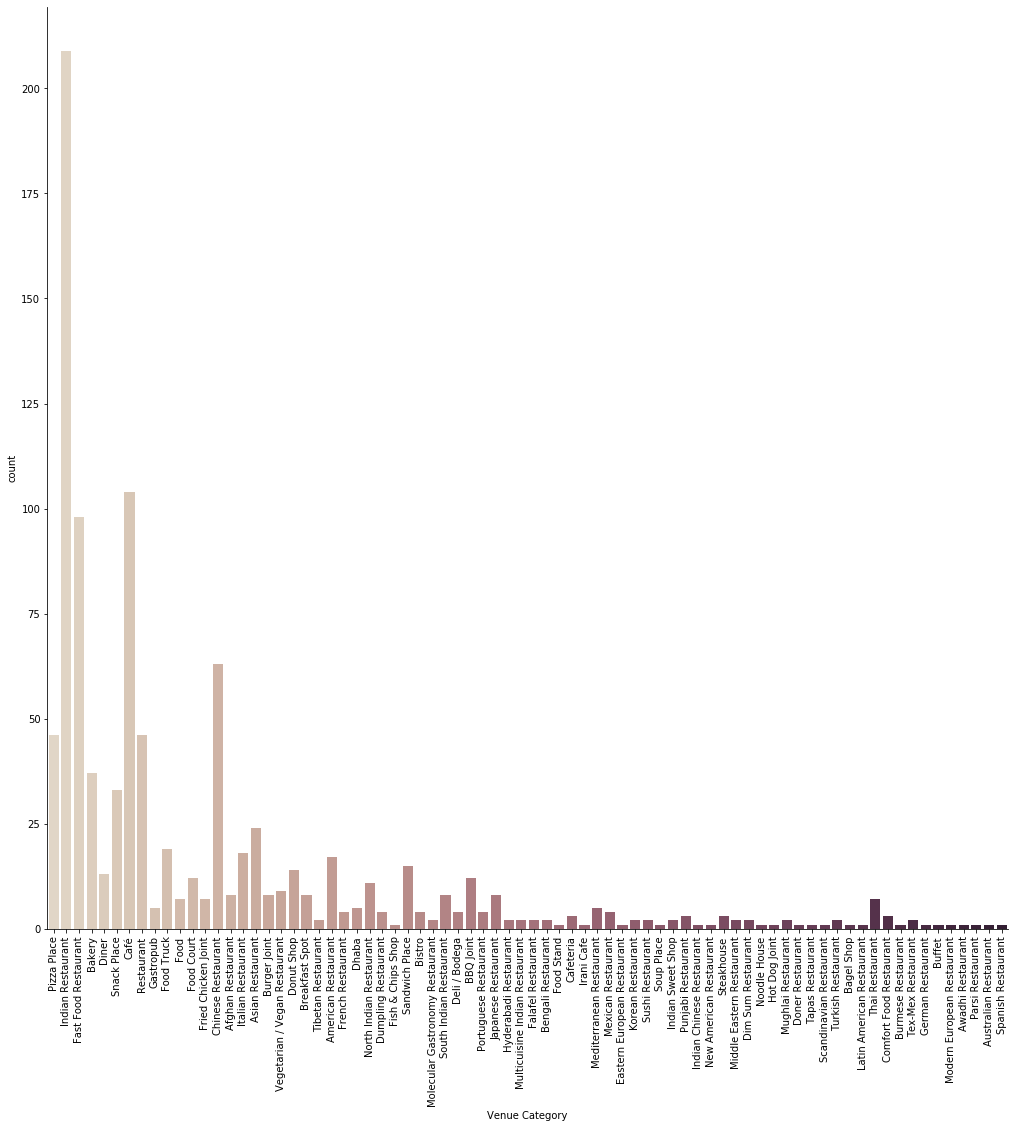

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="Venue Category",kind="count", data = delhi_venues,palette="ch:.25")
g.fig.set_size_inches(20,15)
g.set_xticklabels(rotation=90)

Now let's drop all the neighborhood whose venues details are not in our data frame.

In [18]:
venues_grouped = delhi_venues.groupby('Neighborhood').count().filter(['Neighborhood','Venue Category'])
delhi_df_new = delhi_df.join(venues_grouped, on='Neighborhood')
delhi_df_new.dropna(inplace = True)
delhi_df_new.drop(['Venue Category'],axis =1 ,inplace = True)
delhi_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 184
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       140 non-null    object 
 1   Neighborhood  140 non-null    object 
 2   latitude      140 non-null    float64
 3   longitude     140 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.5+ KB


In [19]:
# delhi_res_df = delhi_venues[delhi_venues['Venue Category'].str.contains("Restaurant")]
delhi_res_df = delhi_venues


In [20]:
res_df = delhi_res_df.groupby('Neighborhood').count().filter(['Neighborhood','Venue Category'])
res_df

,Venue Category
Neighborhood,
Adarsh Nagar,4
Alaknanda,9
Anand Vihar,6
Ashok Vihar,4
Azadpur,4
...,...
Vasundhara Enclave,5
Vikaspuri,4
Vivek Vihar,1


Now let's join our venues neighborhood to the initial dataset we had.

In [21]:
delhi_merged_df = delhi_df_new
delhi_merged_df = delhi_merged_df.join(res_df, on='Neighborhood')


All the places that doesn't have any venue nearby will have NAN values. So let's fill all the null values with 0 and add the number of venues in each neighborhood to our dataframe.

In [22]:
delhi_merged_df = delhi_merged_df.fillna(0)
delhi_merged_df['Venue Category'] = delhi_merged_df['Venue Category'].astype('int64')
delhi_merged_df = delhi_merged_df.rename(columns={"Venue Category": "Number of Venues"})

In [23]:
delhi_merged_df.head()

,Borough,Neighborhood,latitude,longitude,Number of Venues
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,4
1,North West Delhi,Ashok Vihar,28.699453,77.184826,4
2,North West Delhi,Azadpur,28.707657,77.175547,4
7,North West Delhi,Keshav Puram,28.688926,77.161683,5
9,North West Delhi,Kohat Enclave,28.698041,77.140539,7


Once we have organized our data, we need to one hot encode the data so that we can apply our K-Nearest Neighbor model to the data.


In [24]:
delhi_onehot_df = pd.get_dummies(delhi_res_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot_df['Neighborhood'] = delhi_res_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot_df.columns[-1]] + list(delhi_onehot_df.columns[:-1])
delhi_onehot_df = delhi_onehot_df[fixed_columns]
delhi_onehot_df.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,Bengali Restaurant,...,South Indian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adarsh Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ashok Vihar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
delhi_grouped_df = delhi_onehot_df.groupby('Neighborhood').mean().reset_index()

Now let's add the most 10 most common places of each area to the dataframe, so that it becomes easy for us to check the frequency of different types of restaurants in each neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_df = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_df['Neighborhood'] = delhi_grouped_df['Neighborhood']

for ind in np.arange(delhi_grouped_df.shape[0]):
    neighborhoods_venues_sorted_df.iloc[ind, 1:] = return_most_common_venues(delhi_grouped_df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_df.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Pizza Place,Indian Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
1,Alaknanda,BBQ Joint,Indian Restaurant,New American Restaurant,Middle Eastern Restaurant,Steakhouse,Pizza Place,Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dim Sum Restaurant
2,Anand Vihar,Indian Restaurant,Soup Place,Pizza Place,Indian Sweet Shop,Punjabi Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
3,Ashok Vihar,Indian Restaurant,Diner,Bakery,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
4,Azadpur,Snack Place,Café,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant


Apply our KNN model to the data. We will make 4 clusters from our data.

In [65]:
k_clusters = 2

delhi_res_clustering = delhi_grouped_df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(delhi_res_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

Now add the cluster label to all the neighborhoods to plot them on map.

In [66]:
neighborhoods_venues_sorted_df.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged_res = delhi_merged_df


delhi_merged_res = delhi_merged_res.join(neighborhoods_venues_sorted_df.set_index('Neighborhood'), on='Neighborhood')



delhi_merged_res=delhi_merged_res.fillna(0)
delhi_merged_res['Cluster Labels'] = delhi_merged_res['Cluster Labels'].astype('int64')

In [67]:
delhi_merged_res.drop_duplicates()
delhi_merged_res.reset_index(drop = True, inplace = True)

Once we have all the data in one dataframe, we can visualize it.

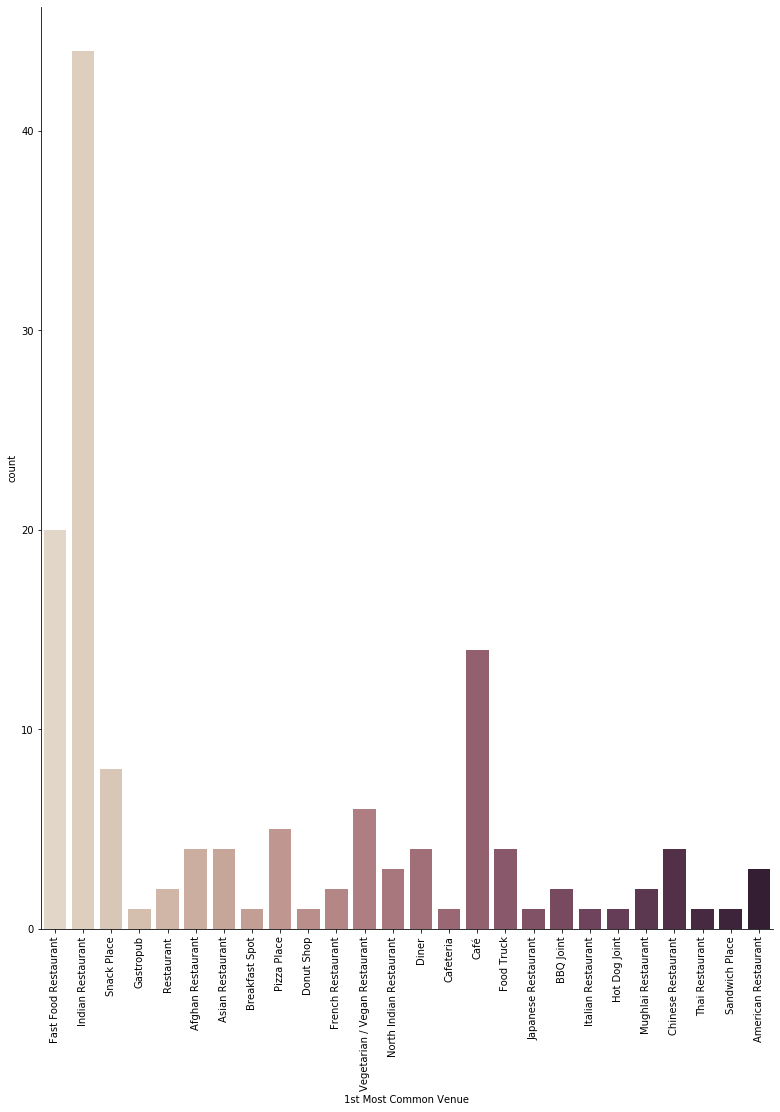

In [68]:
g = sns.catplot(x="1st Most Common Venue",kind="count", data = delhi_merged_res,palette="ch:.25")
g.fig.set_size_inches(15,15)
g.set_xticklabels(rotation=90)

From the above plot we can clearly see that Indian Restaurants are the highest in number. We can see that Italian restaurants are not many and are not 1st most common venue of any neighborhood.

#### Make a heatmap to visualize the areas. It will clearly show the areas that are more crowded and that are less crowded.

In [69]:
from folium import plugins
from folium.plugins import HeatMap
restaurant_latlons = [[res[2], res[3]] for res in delhi_merged_res.values]
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=11.2)
folium.TileLayer('cartodbpositron').add_to(map_delhi) #cartodbpositron cartodbdark_matter
HeatMap(restaurant_latlons).add_to(map_delhi)
folium.Marker([latitude, longitude]).add_to(map_delhi)
folium.Circle([latitude, longitude], radius=3000, fill=False, color='white').add_to(map_delhi)
folium.Circle([latitude, longitude], radius=7000, fill=False, color='white').add_to(map_delhi)
folium.Circle([latitude, longitude], radius=10000, fill=False, color='white').add_to(map_delhi)
map_delhi

Now let's plot our neighborhood on the map according to their cluster and compare the position of clusters with the heatmap.

In [70]:
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red','#03F7ED','#76F91B','blue']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged_res['latitude'], delhi_merged_res['longitude'], delhi_merged_res['Neighborhood'], delhi_merged_res['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

From the heatmap we can clearly see that cluster 0 is mainly crowded with restaurants and cluster 1 is less crowded relatively.

Now let's divide the dataframe on the basis of clusters, so that we can analyse characteristics of each cluster.

In [71]:
df_0 = delhi_merged_res.loc[delhi_merged_res['Cluster Labels'] == 0,delhi_merged_res.columns[[1] + list(range(4, delhi_merged_res.shape[1]))]]
df_0.reset_index(drop = True, inplace = True)

In [72]:
df_1 = delhi_merged_res.loc[delhi_merged_res['Cluster Labels'] == 1,delhi_merged_res.columns[[1] + list(range(4, delhi_merged_res.shape[1]))]]
df_1.reset_index(drop = True, inplace = True)

# Analyzing Clusters

[Text(0.5, 0, 'Delhi Venues')]

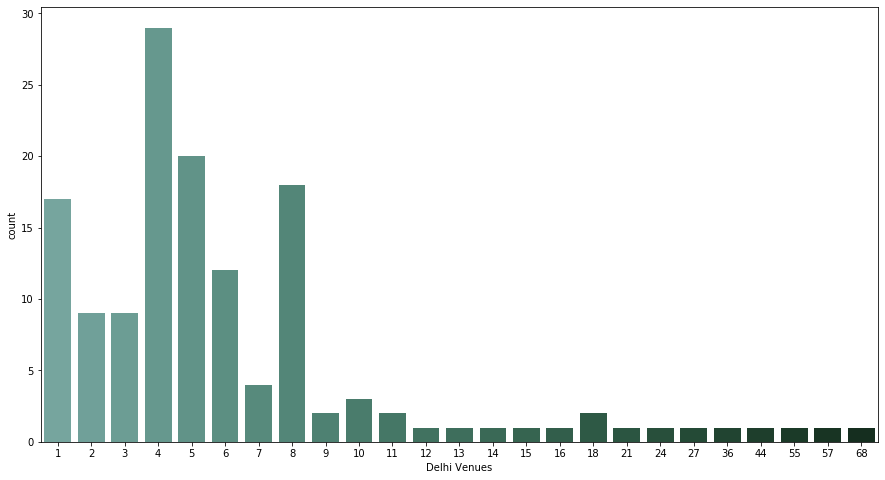

In [79]:
plt.figure(figsize=(15,8))
g = sns.countplot(x="Number of Venues", data = delhi_merged_res,palette="ch:2,r=.2,l=.6")
g.set(xlabel='Delhi Venues')


[Text(0.5, 0, 'df_1')]

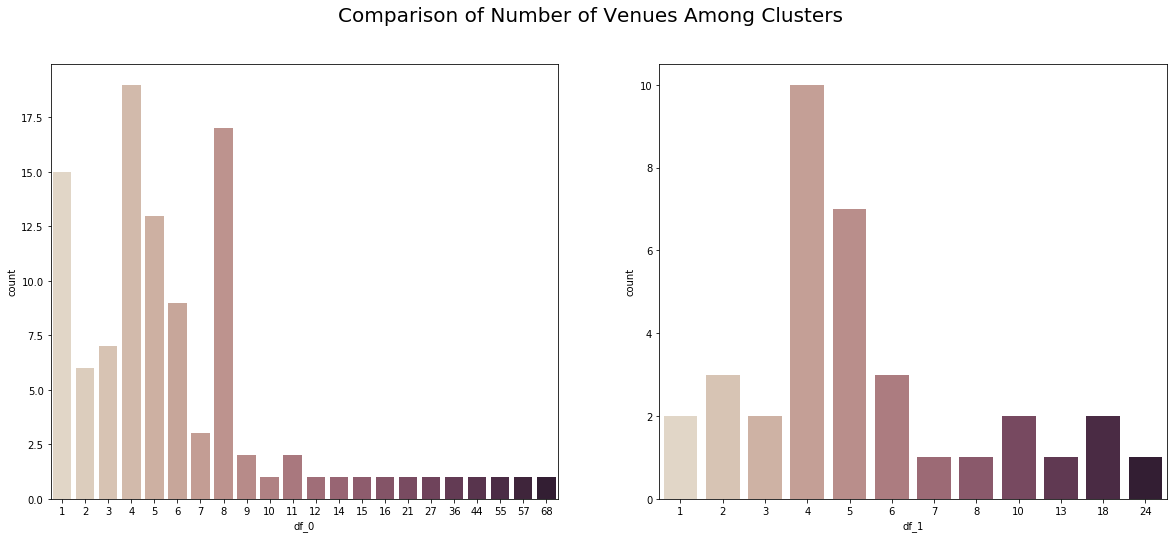

In [82]:
fig, axs = plt.subplots(ncols= 2,figsize=(20,8))

h = sns.countplot(x="Number of Venues", data = df_0,palette="ch:.25", ax = axs[0])
i = sns.countplot(x="Number of Venues", data = df_1,palette="ch:.25",ax = axs[1])

plt.suptitle("Comparison of Number of Venues Among Clusters", fontsize=20)
h.set(xlabel='df_0')
i.set(xlabel='df_1')



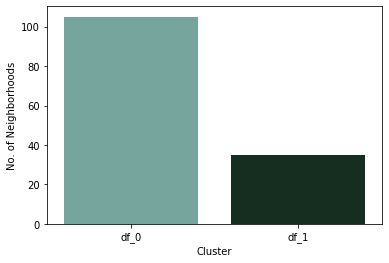

In [83]:
df = pd.DataFrame([('df_0',df_0.shape[0]),('df_1',df_1.shape[0])])
df.columns = ["Cluster","No. of Neighborhoods"]
u = sns.barplot(x="Cluster",y = "No. of Neighborhoods",data = df,palette = 'ch:2,r=.2,l=.6')

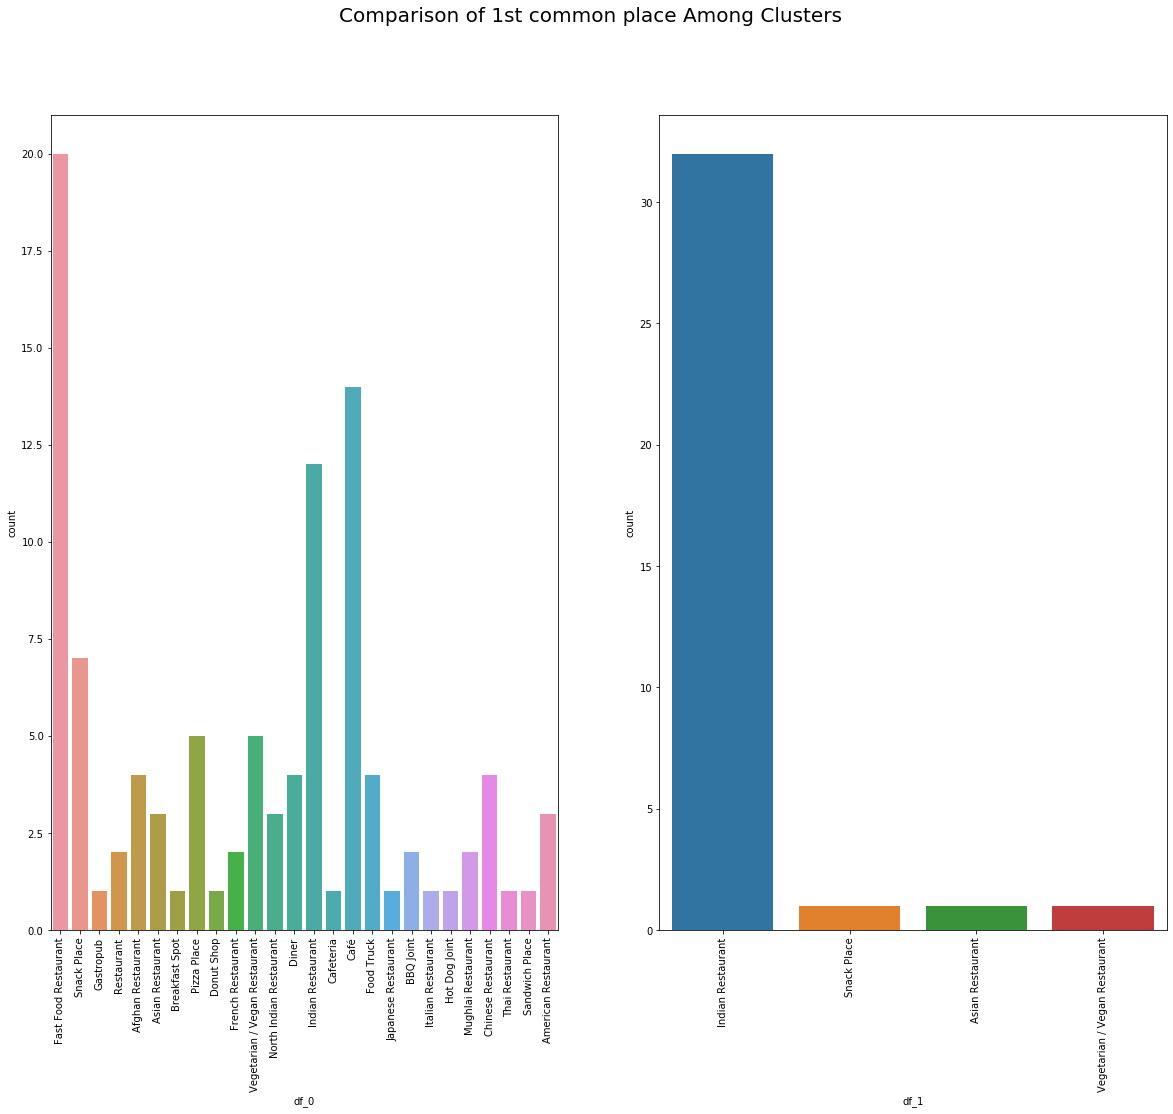

In [89]:

fig, axs = plt.subplots(ncols =2,figsize = (20,15))
p = sns.countplot(x='1st Most Common Venue', data=df_0, ax=axs[0])
q = sns.countplot(x='1st Most Common Venue', data=df_1, ax=axs[1])

p.set(xlabel='df_0')
q.set(xlabel='df_1')

plt.suptitle("Comparison of 1st common place Among Clusters", fontsize=20)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.6)

Cluster 0 seems to have mostly foreign foods venues as compared to cluster 1.

So now we will analyse the clusters separately.

Since maximum neighborhoods have 4 venues, we will check 4 most common venues of each cluster.

# df_0

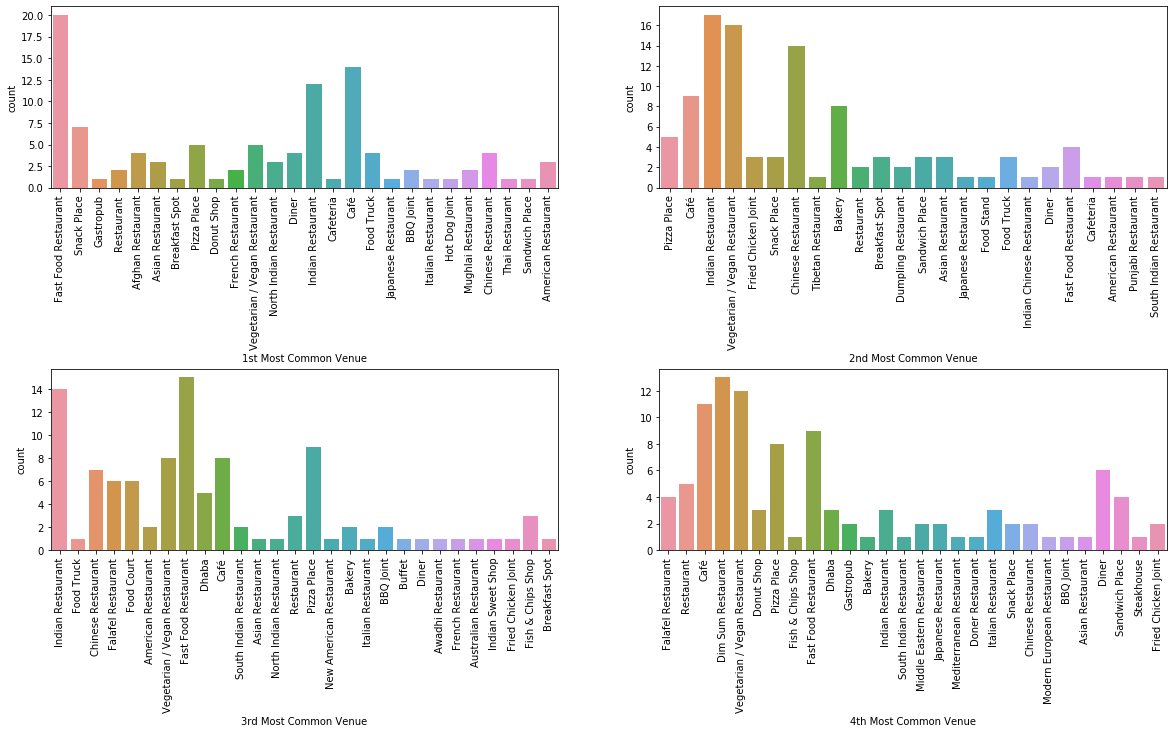

In [94]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize = (20,10))
p = sns.countplot(x='1st Most Common Venue', data=df_0, ax=ax1[0])
q = sns.countplot(x='2nd Most Common Venue', data=df_0, ax=ax1[1])
r = sns.countplot(x='3rd Most Common Venue',data=df_0, ax=ax2[0])
s = sns.countplot(x='4th Most Common Venue',data=df_0, ax=ax2[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
  
plt.subplots_adjust(hspace = 1)

# df_1

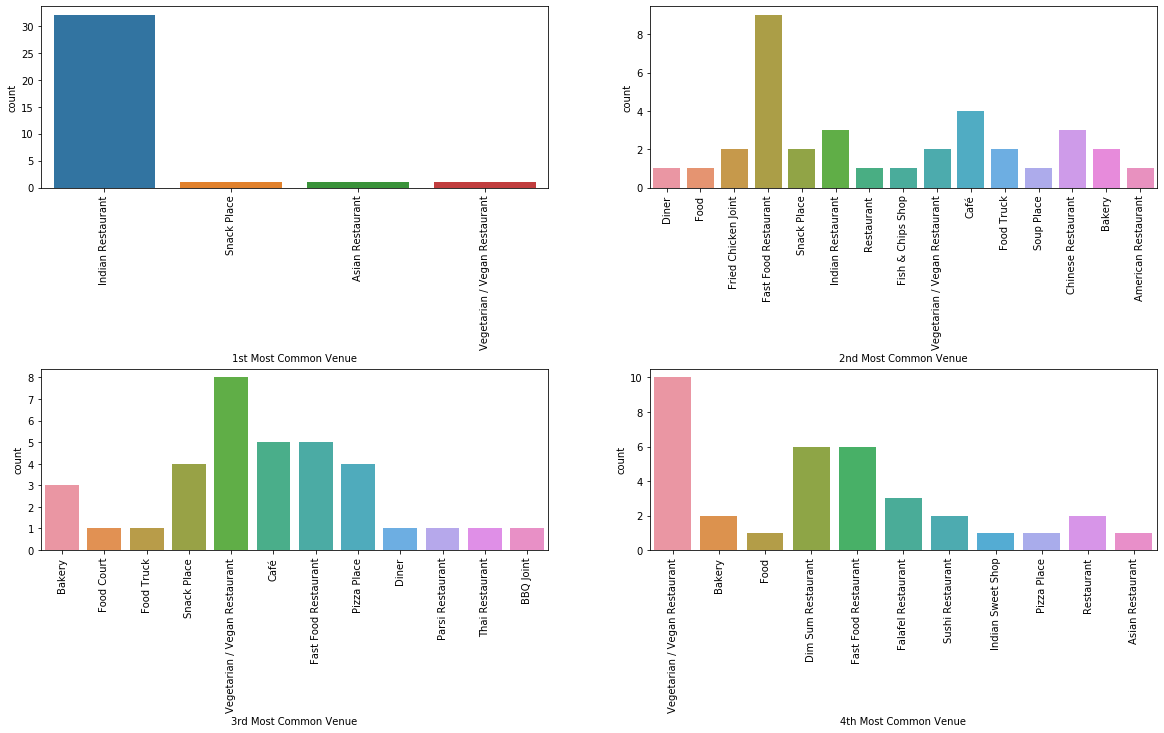

In [95]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize = (20,10))
p = sns.countplot(x='1st Most Common Venue', data=df_1, ax=ax1[0])
q = sns.countplot(x='2nd Most Common Venue', data=df_1, ax=ax1[1])
r = sns.countplot(x='3rd Most Common Venue',data=df_1, ax=ax2[0])
s = sns.countplot(x='4th Most Common Venue',data=df_1, ax=ax2[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 1)

From these we can conclude that Cluster 0 neighborhoods have a variety of restaurants. Overall the majority of restaurants are Fast food restaurants. Italian restaurants are less in number but still more as compared to cluster 1.

Cluster 1 neighborhoods have a majority of Indian Restaurants and there are not Italian restaurants at all in the 4 most common venues. This clusters fits well to our requirements.

Since we want to consider areas with less restaurants we will only visualize areas that have less than 2 restaurants

In [111]:
x_0 = df_0[df_0['Number of Venues']<2] #since these have more foriegn restaurants, we will go for less than 2
x_1 = df_1[df_1['Number of Venues']<=2]

In [112]:
x_0

,Neighborhood,Number of Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Rithala,1,0,Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
13,Pratap Nagar,1,0,Pizza Place,Vegetarian / Vegan Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
17,Timarpur,1,0,French Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
18,Wazirabad,1,0,Snack Place,Vegetarian / Vegan Restaurant,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Fast Food Restaurant
27,Chanakyapuri,1,0,Diner,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop
33,East Vinod Nagar,1,0,Diner,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop
39,Vivek Vihar,1,0,Japanese Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
69,Siri Fort,1,0,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop
86,Paschim Vihar,1,0,BBQ Joint,Vegetarian / Vegan Restaurant,Fish & Chips Shop,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
87,Patel Nagar,1,0,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant,Fish & Chips Shop


We will consider only those neighborhoods that doesn't have any foreign restaurants.

In [116]:
x_0.drop(x_0[(x_0['1st Most Common Venue'] == 'American Restaurant') | (x_0['1st Most Common Venue']=='Japanese Restaurant') | (x_0['1st Most Common Venue']=='French Restaurant')].index, inplace =True)

C:\Users\Priyanka\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [117]:
x_1

,Neighborhood,Number of Venues,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Pragati Maidan,1,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
13,Pandav Nagar,2,1,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
21,New Friends Colony,2,1,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
24,Inderpuri,2,1,Vegetarian / Vegan Restaurant,Indian Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant
33,"Dabri, New Delhi",1,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Falafel Restaurant


We can see that there are no Italian Restaurants in these ares. These are also not crowded with restaurants. So these areas will be suitable for our restaurant.

In [118]:
final_df = pd.concat([x_0,x_1])
final_df.reset_index(drop = True, inplace = True)

In [119]:
final_df.filter(['Neighborhood', 'Number of Venues'])

,Neighborhood,Number of Venues
0,Rithala,1
1,Pratap Nagar,1
2,Wazirabad,1
3,Chanakyapuri,1
4,East Vinod Nagar,1
5,Siri Fort,1
6,Paschim Vihar,1
7,Patel Nagar,1
8,Gulabi Bagh,1
9,Tees Hazari,1


These neighborhoods will be suitable for our restaurant.